In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca
from src.concept_vectors import *

2022-11-22 10:45:02.084597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 10:45:02.340870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 10:45:02.340924: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-22 10:45:02.413565: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 10:45:05.666842: W tensorflow/stream_executor/platform/default

In [4]:
concepts = ["German shepherd","bulldog","Komodo dragon","Gila monster",
                   "cardinal","woodpecker","sweater","three-piece suit","school","house"]
bottlenecks = ["mixed4c"]
experiments_per_concept = 20
concept_vectors = []
concept_metadata = []

In [5]:
for i in concepts:    
    concept_data = load_tcav_vectors(i,bottlenecks)
    assert len(concept_data[1]) == experiments_per_concept
    concept_vectors+=list(concept_data[0])
    concept_metadata+=concept_data[1]
concept_vectors = np.array(concept_vectors)

In [6]:
label_by_concept = [i['concept'] for i in concept_metadata]
label_by_random = [i['random_concept'] for i in concept_metadata]

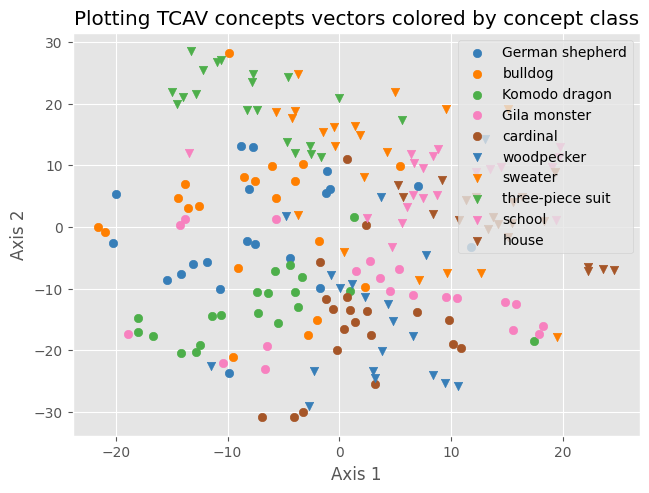

In [14]:
plt.title("Plotting TCAV concepts vectors colored by concept class")
plt.tight_layout()
plot_tsne(concept_vectors,label_by_concept)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.savefig("scripts/Figures/tcav_concept_tsne.png", bbox_inches="tight")

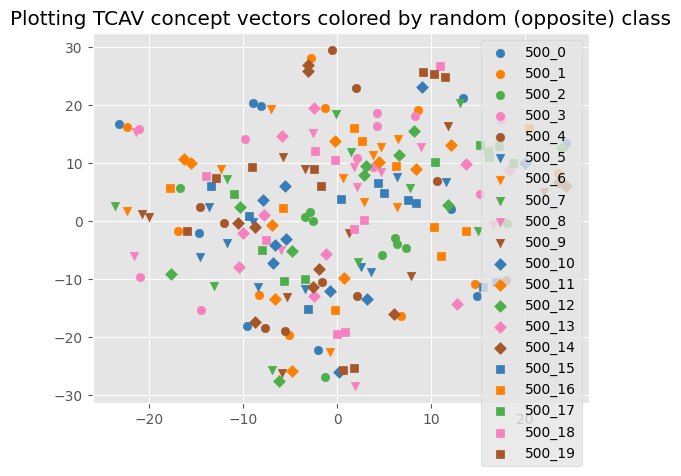

In [11]:
plt.title("Plotting TCAV concept vectors colored by random (opposite) class")
plot_tsne(concept_vectors,label_by_random)